In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("sepsis.csv")

In [3]:
dataset['SepsisLabel'].value_counts()

0    37945
1      864
Name: SepsisLabel, dtype: int64

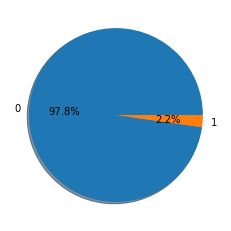

C:\Users\saisr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


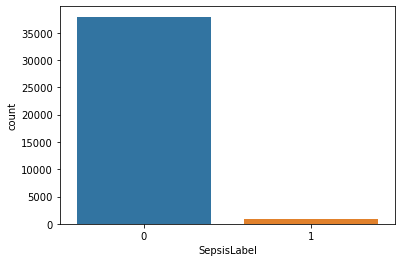

In [4]:
plt.pie(dataset['SepsisLabel'].value_counts(), labels=['0','1'], autopct='%1.1f%%', shadow=True)
plt.show()
sns.countplot(dataset['SepsisLabel'], label="Count")
plt.show()

In [5]:
from sklearn.utils import resample
df_majority = dataset[dataset.SepsisLabel==0]
df_minority = dataset[dataset.SepsisLabel==1]

In [6]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=37945,    # to match majority class
                                 random_state=123) # reproducible results

In [7]:
dataset.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
HR,38809.0,77.644979,28.954355,0.00,69.00,82.00,95.00,181.00
O2Sat,38809.0,84.406233,32.984005,0.00,95.00,97.00,99.00,100.00
Temp,38809.0,12.551628,17.532129,0.00,0.00,0.00,36.56,40.50
SBP,38809.0,102.036081,47.501863,0.00,97.00,113.00,130.00,234.50
MAP,38809.0,69.932561,28.396126,0.00,65.00,74.67,85.00,294.00
DBP,38809.0,30.840501,31.363911,0.00,0.00,40.00,59.00,287.00
Resp,38809.0,16.584987,7.851959,0.00,14.00,17.00,21.00,67.00
EtCO2,38809.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
BaseExcess,38809.0,-0.081592,1.465309,-23.00,0.00,0.00,0.00,24.00
HCO3,38809.0,1.940723,6.674337,0.00,0.00,0.00,0.00,48.00


In [8]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [9]:
df_upsampled.head

<bound method NDFrame.head of           HR  O2Sat  Temp     SBP    MAP   DBP  Resp  EtCO2  BaseExcess  HCO3  \
0        0.0    0.0   0.0    0.00   0.00   0.0   0.0    0.0         0.0   0.0   
1       97.0   95.0   0.0   98.00  75.33   0.0  19.0    0.0         0.0   0.0   
2       89.0   99.0   0.0  122.00  86.00   0.0  22.0    0.0         0.0   0.0   
3       90.0   95.0   0.0    0.00   0.00   0.0  30.0    0.0        24.0   0.0   
4      103.0   88.5   0.0  122.00  91.33   0.0  24.5    0.0         0.0   0.0   
...      ...    ...   ...     ...    ...   ...   ...    ...         ...   ...   
14734  115.0   94.0   0.0   79.25  50.50  43.5  24.0    0.0        -1.0   0.0   
10913    0.0    0.0   0.0    0.00   0.00   0.0   0.0    0.0         0.0   0.0   
18804  109.0   93.0   0.0  113.00  75.00  61.0  26.0    0.0        -3.0  19.0   
2382    82.0   94.0   0.0  104.00  69.00  52.0  18.0    0.0         0.0   0.0   
10919  119.0   98.5   0.0  129.00  85.67   0.0  26.0    0.0         0.0   0.0  

In [10]:
df_upsampled.SepsisLabel.value_counts()

0    37945
1    37945
Name: SepsisLabel, dtype: int64

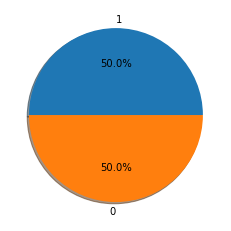

C:\Users\saisr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


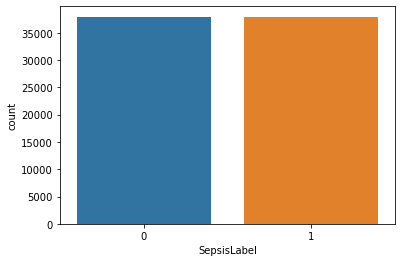

In [11]:
plt.pie(df_upsampled['SepsisLabel'].value_counts(), labels=['1','0'], autopct='%1.1f%%', shadow=True)
plt.show()
sns.countplot(df_upsampled['SepsisLabel'], label="Count")
plt.show()

In [12]:
X = df_upsampled[df_upsampled.columns[0:40]].values

In [13]:
Y = df_upsampled[df_upsampled.columns[40:]].values

In [14]:
print("sepsis dimensions : {}".format(df_upsampled.shape))

sepsis dimensions : (75890, 41)


Printing dimensions of sepsis dataset without label column

In [15]:
print("sepsis dimensions without label : {}".format(X.shape))

sepsis dimensions without label : (75890, 40)


Printing dimensions of sepsis dataset only with label column

In [16]:
print("sepsis dimensions only label : {}".format(Y.shape))

sepsis dimensions only label : (75890, 1)


LabelEncoder is used to normalize labels.

In [17]:
labelencoder_Y = preprocessing.LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

C:\Users\saisr\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [18]:
df_upsampled.describe

<bound method NDFrame.describe of           HR  O2Sat  Temp     SBP    MAP   DBP  Resp  EtCO2  BaseExcess  HCO3  \
0        0.0    0.0   0.0    0.00   0.00   0.0   0.0    0.0         0.0   0.0   
1       97.0   95.0   0.0   98.00  75.33   0.0  19.0    0.0         0.0   0.0   
2       89.0   99.0   0.0  122.00  86.00   0.0  22.0    0.0         0.0   0.0   
3       90.0   95.0   0.0    0.00   0.00   0.0  30.0    0.0        24.0   0.0   
4      103.0   88.5   0.0  122.00  91.33   0.0  24.5    0.0         0.0   0.0   
...      ...    ...   ...     ...    ...   ...   ...    ...         ...   ...   
14734  115.0   94.0   0.0   79.25  50.50  43.5  24.0    0.0        -1.0   0.0   
10913    0.0    0.0   0.0    0.00   0.00   0.0   0.0    0.0         0.0   0.0   
18804  109.0   93.0   0.0  113.00  75.00  61.0  26.0    0.0        -3.0  19.0   
2382    82.0   94.0   0.0  104.00  69.00  52.0  18.0    0.0         0.0   0.0   
10919  119.0   98.5   0.0  129.00  85.67   0.0  26.0    0.0         0.0   0

For splitting data into train set and test set, train_test_split function is used

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
print("Training data dimensions :{}".format(X_train.shape))
print("Testing data dimensions :{}".format(X_test.shape))

Training data dimensions :(60712, 40)
Testing data dimensions :(15178, 40)


In [20]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
classifiers = [
    
    AdaBoostClassifier(),
    
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    LGBMClassifier()
    
    ]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, Y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(Y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(Y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

AdaBoostClassifier
****Results****
Accuracy: 79.8261%
Log Loss: 0.673179268387368
GaussianNB
****Results****
Accuracy: 57.7678%
Log Loss: 2.120984212868764
LinearDiscriminantAnalysis
****Results****
Accuracy: 72.4074%
Log Loss: 0.5490759157904654
LGBMClassifier
****Results****
Accuracy: 98.8734%
Log Loss: 0.06489765864157232


For comparision purpose, We have printed Bar Graph for Classifier Accuracy and Classifier Log Loss.

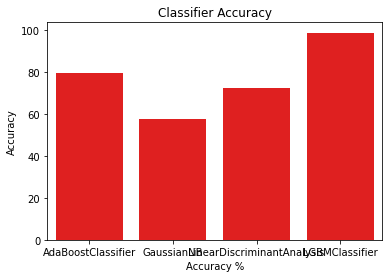

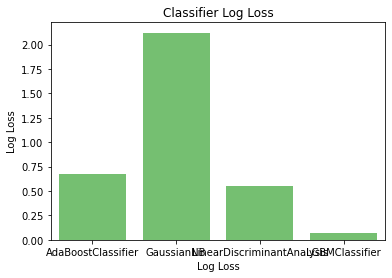

In [21]:

sns.barplot(x='Classifier', y='Accuracy', data=log, color="r")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Classifier', y='Log Loss', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [22]:


clf = MLPClassifier(activation='tanh',hidden_layer_sizes=(40,10,10,10,10, 2), max_iter=13000,early_stopping=False,solver='lbfgs',batch_size='auto', verbose=10,  learning_rate_init=1e-5,  random_state=1,tol=1e-4)

clf.fit(X_train, Y_train)
y_pred1 = clf.predict(X_test)
y_pred = clf.predict_proba(X_test)



C:\Users\saisr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
acc1= accuracy_score(Y_test, y_pred1)
print(accuracy_score(Y_test, y_pred1))
l2 = log_loss(Y_test, y_pred)
print("Log Loss: {}".format(ll))
name = clf.__class__.__name__
log_entry = pd.DataFrame([[name, acc1*100, l2]], columns=log_cols)
log = log.append(log_entry)
    

    
    


0.9453814731848729
Log Loss: 0.06489765864157232


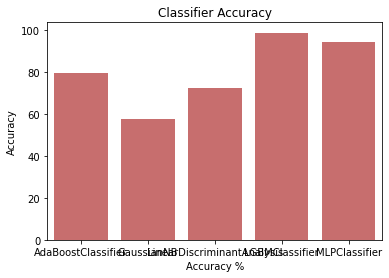

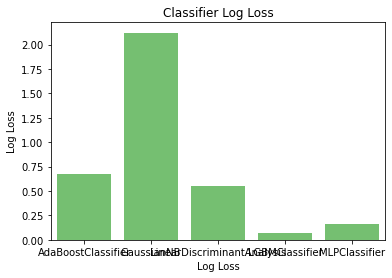

In [24]:

sns.barplot(x='Classifier', y='Accuracy', data=log, color="r")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Classifier', y='Log Loss', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()